In [3]:
import nltk
nltk.download('punkt') # Tokenizador de palabras
nltk.download('stopwords') # Lista de stopword
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import SnowballStemmer
from nltk.util import ngrams
from collections import Counter
import string

nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import pandas as pd
df = pd.read_csv('booksummaries.txt', sep='\t',header=None,names=['wikipedia_id','freebase_id','title','author','date','genres','plot_summary'])
df

,wikipedia_id,freebase_id,title,author,date,genres,plot_summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ..."
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,Colbert addresses topics including Wall Stree...


In [5]:
# Cantidad de libros por autor

df_books_per_author = pd.DataFrame(df['author'].value_counts())
df_books_per_author['author_percentaje'] = 100*df_books_per_author.values/len(df)
df_books_per_author

,count,author_percentaje
author,,
Agatha Christie,74,0.446887
Franklin W. Dixon,68,0.410653
K. A. Applegate,62,0.374419
Stephen King,60,0.362341
Edgar Rice Burroughs,59,0.356302
...,...,...
Julian Fellowes,1,0.006039
Charles R. Jackson,1,0.006039
Mark Morris,1,0.006039


In [6]:
print(f"El porcentaje de libros con autor es: {100 * (len(df) - df.isnull().sum()['author'])/len(df):.2f}")

El porcentaje de libros con autor es: 85.62


In [7]:
# Perido de los libros
import matplotlib.pyplot as plt

df['years'] = df['date'].str.split('-',expand=True)[0]
df['years'] = pd.to_numeric(df['years'])
df['years'].value_counts().sort_index()



years
398.0       1
1005.0      1
1021.0      1
1499.0      2
1516.0      2
         ... 
2009.0    287
2010.0    200
2011.0    126
2012.0     20
2013.0      1
Name: count, Length: 273, dtype: int64

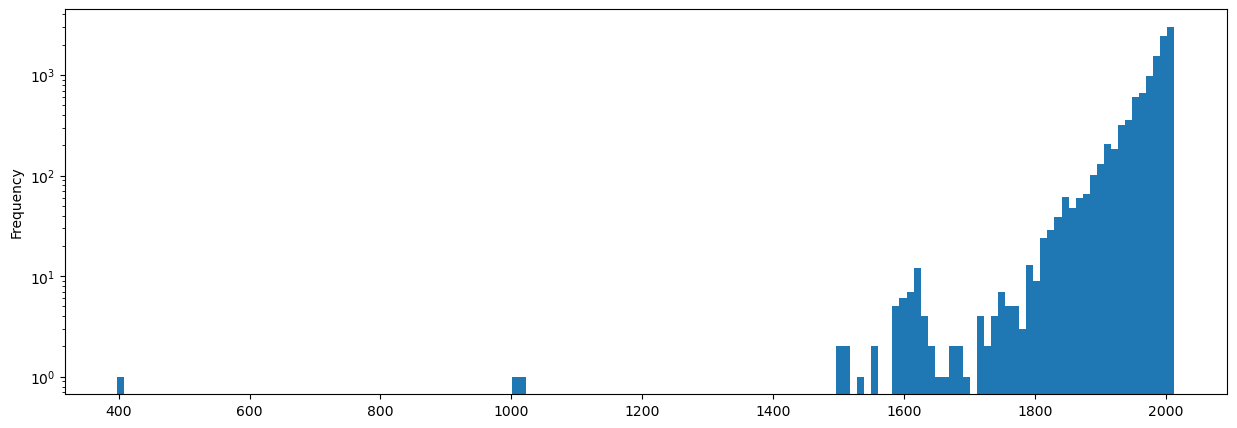

In [8]:
import matplotlib.pyplot as plt
df_per_year =df[df['years'].notnull()]['years']
df_per_year.plot(kind='hist',bins=150,range=(398,2013),figsize=(15,5))
plt.yscale('log')


In [9]:
print('Libro más reciente: ' + df[df['years'].notnull()].sort_values(by='years',ascending=False).head(1)['title'].values[0])
print('Libro más antiguo: ' + df[df['years'].notnull()].sort_values(by='years',ascending=False).tail(1)['title'].values[0])

Libro más reciente: Dr. Sleep
Libro más antiguo: The Confessions of St. Augustine


In [10]:
df['len_title'] = df['title'].apply(len)
df

,wikipedia_id,freebase_id,title,author,date,genres,plot_summary,years,len_title
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca...",1945.0,11
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan...",1962.0,18
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...,1947.0,10
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,NaN,41
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...,NaN,20
...,...,...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ...",2012.0,14
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...,2000.0,17
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...,2010.0,7
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,Colbert addresses topics including Wall Stree...,2012.0,57


In [11]:
print('Libro con el titulo más largo es: ' + df.sort_values(by='len_title',ascending=False).head(1)['title'].values[0])
print('Libro con el titulo más corto es: ' + df.sort_values(by='len_title',ascending=False).tail(1)['title'].values[0])

Libro con el titulo más largo es: Passionate Minds: The Great Love Affair of the Enlightenment, Featuring the Scientist Emilie du Chatelet, the Poet Voltaire, Sword Fights, Book Burnings, Assorted Kings, Seditious Verse, and the Birth of the Modern World
Libro con el titulo más corto es: Q


In [12]:
# Libros por genero

import json

def getGenres(genre):
    if pd.isnull(genre):
        return []
    return list(json.loads(genre).values())

df['genres_names'] = df['genres'].apply(getGenres)
df


,wikipedia_id,freebase_id,title,author,date,genres,plot_summary,years,len_title,genres_names
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca...",1945.0,11,"[Roman à clef, Satire, Children's literature, ..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan...",1962.0,18,"[Science Fiction, Novella, Speculative fiction..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...,1947.0,10,"[Existentialism, Fiction, Absurdist fiction, N..."
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,NaN,41,[]
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...,NaN,20,"[Hard science fiction, Science Fiction, Specul..."
...,...,...,...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ...",2012.0,14,[]
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...,2000.0,17,"[Thriller, Fiction]"
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...,2010.0,7,[Autobiography]
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,Colbert addresses topics including Wall Stree...,2012.0,57,[]


In [13]:
df_per_genre = df.explode('genres_names')
df_per_genre.value_counts('genres_names')

genres_names
Fiction                4747
Speculative fiction    4314
Science Fiction        2870
Novel                  2463
Fantasy                2413
                       ... 
Fantastique               1
Conspiracy                1
Fable                     1
Computer Science          1
Fictional crossover       1
Name: count, Length: 227, dtype: int64

Preprocesamiento del texto

In [14]:
#Cantidad de palabras resumen
def pre_process_summary(text):
    summary = text.lower()
    summary = summary.translate(str.maketrans('','',string.punctuation))
    return summary

df['plot_summary'] =  df['plot_summary'].apply(pre_process_summary)
words_summary = df['plot_summary'].apply(lambda text: len(text.split()))
words_summary


0         947
1         998
2        1119
3        2820
4         722
         ... 
16554     151
16555     211
16556     307
16557      20
16558     636
Name: plot_summary, Length: 16559, dtype: int64

In [15]:
print(f"El promedio de palabras de los resumenes es: {words_summary.values.mean():.2f}")


El promedio de palabras de los resumenes es: 428.58


In [16]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    word_tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return word_tokens

df['plot_summary_rm_stopowords'] = df['plot_summary'].apply(remove_stopwords)
df


,wikipedia_id,freebase_id,title,author,date,genres,plot_summary,years,len_title,genres_names,plot_summary_rm_stopowords
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...",old major the old boar on the manor farm call...,1945.0,11,"[Roman à clef, Satire, Children's literature, ...","[old, major, old, boar, manor, farm, calls, an..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",alex a teenager living in nearfuture england ...,1962.0,18,"[Science Fiction, Novella, Speculative fiction...","[alex, teenager, living, nearfuture, england, ..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",the text of the plague is divided into five p...,1947.0,10,"[Existentialism, Fiction, Absurdist fiction, N...","[text, plague, divided, five, parts, town, ora..."
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,the argument of the enquiry proceeds by a ser...,NaN,41,[],"[argument, enquiry, proceeds, series, incremen..."
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",the novel posits that space around the milky ...,NaN,20,"[Hard science fiction, Science Fiction, Specul...","[novel, posits, space, around, milky, way, div..."
...,...,...,...,...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,prue mckeel having rescued her brother from t...,2012.0,14,[],"[prue, mckeel, rescued, brother, dowager, gove..."
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",the reader first meets rapp while he is doing...,2000.0,17,"[Thriller, Fiction]","[reader, first, meets, rapp, covert, operation..."
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",the book follows very rough chronological ord...,2010.0,7,[Autobiography],"[book, follows, rough, chronological, order, s..."
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,colbert addresses topics including wall stree...,2012.0,57,[],"[colbert, addresses, topics, including, wall, ..."


In [17]:
#Lemmatización
def lemmatizier(text):
    lemmatizier = WordNetLemmatizer()
    return [lemmatizier.lemmatize(token) for token in text]

df['plot_summary_lem'] = df['plot_summary_rm_stopowords'].apply(lemmatizier)
df

,wikipedia_id,freebase_id,title,author,date,genres,plot_summary,years,len_title,genres_names,plot_summary_rm_stopowords,plot_summary_lem
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...",old major the old boar on the manor farm call...,1945.0,11,"[Roman à clef, Satire, Children's literature, ...","[old, major, old, boar, manor, farm, calls, an...","[old, major, old, boar, manor, farm, call, ani..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",alex a teenager living in nearfuture england ...,1962.0,18,"[Science Fiction, Novella, Speculative fiction...","[alex, teenager, living, nearfuture, england, ...","[alex, teenager, living, nearfuture, england, ..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",the text of the plague is divided into five p...,1947.0,10,"[Existentialism, Fiction, Absurdist fiction, N...","[text, plague, divided, five, parts, town, ora...","[text, plague, divided, five, part, town, oran..."
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,the argument of the enquiry proceeds by a ser...,NaN,41,[],"[argument, enquiry, proceeds, series, incremen...","[argument, enquiry, proceeds, series, incremen..."
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",the novel posits that space around the milky ...,NaN,20,"[Hard science fiction, Science Fiction, Specul...","[novel, posits, space, around, milky, way, div...","[novel, posit, space, around, milky, way, divi..."
...,...,...,...,...,...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,prue mckeel having rescued her brother from t...,2012.0,14,[],"[prue, mckeel, rescued, brother, dowager, gove...","[prue, mckeel, rescued, brother, dowager, gove..."
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",the reader first meets rapp while he is doing...,2000.0,17,"[Thriller, Fiction]","[reader, first, meets, rapp, covert, operation...","[reader, first, meet, rapp, covert, operation,..."
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",the book follows very rough chronological ord...,2010.0,7,[Autobiography],"[book, follows, rough, chronological, order, s...","[book, follows, rough, chronological, order, s..."
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,colbert addresses topics including wall stree...,2012.0,57,[],"[colbert, addresses, topics, including, wall, ...","[colbert, address, topic, including, wall, str..."


In [18]:
#Stemming
def stemming(text):
    stemmer = SnowballStemmer('english')
    return [stemmer.stem(token) for token in text]

df['plot_summary_stem'] = df['plot_summary_rm_stopowords'].apply(stemming)
df

,wikipedia_id,freebase_id,title,author,date,genres,plot_summary,years,len_title,genres_names,plot_summary_rm_stopowords,plot_summary_lem,plot_summary_stem
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...",old major the old boar on the manor farm call...,1945.0,11,"[Roman à clef, Satire, Children's literature, ...","[old, major, old, boar, manor, farm, calls, an...","[old, major, old, boar, manor, farm, call, ani...","[old, major, old, boar, manor, farm, call, ani..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",alex a teenager living in nearfuture england ...,1962.0,18,"[Science Fiction, Novella, Speculative fiction...","[alex, teenager, living, nearfuture, england, ...","[alex, teenager, living, nearfuture, england, ...","[alex, teenag, live, nearfutur, england, lead,..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",the text of the plague is divided into five p...,1947.0,10,"[Existentialism, Fiction, Absurdist fiction, N...","[text, plague, divided, five, parts, town, ora...","[text, plague, divided, five, part, town, oran...","[text, plagu, divid, five, part, town, oran, t..."
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,the argument of the enquiry proceeds by a ser...,NaN,41,[],"[argument, enquiry, proceeds, series, incremen...","[argument, enquiry, proceeds, series, incremen...","[argument, enquiri, proceed, seri, increment, ..."
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",the novel posits that space around the milky ...,NaN,20,"[Hard science fiction, Science Fiction, Specul...","[novel, posits, space, around, milky, way, div...","[novel, posit, space, around, milky, way, divi...","[novel, posit, space, around, milki, way, divi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,prue mckeel having rescued her brother from t...,2012.0,14,[],"[prue, mckeel, rescued, brother, dowager, gove...","[prue, mckeel, rescued, brother, dowager, gove...","[prue, mckeel, rescu, brother, dowag, gover, c..."
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",the reader first meets rapp while he is doing...,2000.0,17,"[Thriller, Fiction]","[reader, first, meets, rapp, covert, operation...","[reader, first, meet, rapp, covert, operation,...","[reader, first, meet, rapp, covert, oper, iran..."
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",the book follows very rough chronological ord...,2010.0,7,[Autobiography],"[book, follows, rough, chronological, order, s...","[book, follows, rough, chronological, order, s...","[book, follow, rough, chronolog, order, switch..."
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,colbert addresses topics including wall stree...,2012.0,57,[],"[colbert, addresses, topics, including, wall, ...","[colbert, address, topic, including, wall, str...","[colbert, address, topic, includ, wall, street..."


In [19]:
#cantidad de palabras diferentes
num_words_per_summary = pd.DataFrame(columns=['num_words','num_words_lem','num_words_stem'])
num_words_per_summary['num_words'] = df['plot_summary_rm_stopowords'].apply(lambda tokens: len(set(tokens)))
num_words_per_summary['num_words_lem'] = df['plot_summary_lem'].apply(lambda tokens: len(set(tokens)))
num_words_per_summary['num_words_stem'] = df['plot_summary_stem'].apply(lambda tokens: len(set(tokens)))
num_words_per_summary

,num_words,num_words_lem,num_words_stem
0,332,319,298
1,424,414,398
2,446,426,401
3,794,726,649
4,294,280,262
...,...,...,...
16554,78,78,77
16555,90,88,86
16556,116,110,104
16557,15,15,15


In [20]:
# Generar columna de etiqueta
df_per_genre = df.explode('genres_names')
isScienceFiction = df_per_genre['genres_names'].isin(['Science Fiction'])

In [21]:
wiki_ids = df_per_genre[isScienceFiction]['wikipedia_id'].values
df['Sciencifiction'] = 0
df.loc[df['wikipedia_id'].isin(wiki_ids),'Sciencifiction'] = 1
df

,wikipedia_id,freebase_id,title,author,date,genres,plot_summary,years,len_title,genres_names,plot_summary_rm_stopowords,plot_summary_lem,plot_summary_stem,Sciencifiction
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...",old major the old boar on the manor farm call...,1945.0,11,"[Roman à clef, Satire, Children's literature, ...","[old, major, old, boar, manor, farm, calls, an...","[old, major, old, boar, manor, farm, call, ani...","[old, major, old, boar, manor, farm, call, ani...",0
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",alex a teenager living in nearfuture england ...,1962.0,18,"[Science Fiction, Novella, Speculative fiction...","[alex, teenager, living, nearfuture, england, ...","[alex, teenager, living, nearfuture, england, ...","[alex, teenag, live, nearfutur, england, lead,...",1
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",the text of the plague is divided into five p...,1947.0,10,"[Existentialism, Fiction, Absurdist fiction, N...","[text, plague, divided, five, parts, town, ora...","[text, plague, divided, five, part, town, oran...","[text, plagu, divid, five, part, town, oran, t...",0
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,the argument of the enquiry proceeds by a ser...,NaN,41,[],"[argument, enquiry, proceeds, series, incremen...","[argument, enquiry, proceeds, series, incremen...","[argument, enquiri, proceed, seri, increment, ...",0
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",the novel posits that space around the milky ...,NaN,20,"[Hard science fiction, Science Fiction, Specul...","[novel, posits, space, around, milky, way, div...","[novel, posit, space, around, milky, way, divi...","[novel, posit, space, around, milki, way, divi...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,prue mckeel having rescued her brother from t...,2012.0,14,[],"[prue, mckeel, rescued, brother, dowager, gove...","[prue, mckeel, rescued, brother, dowager, gove...","[prue, mckeel, rescu, brother, dowag, gover, c...",0
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",the reader first meets rapp while he is doing...,2000.0,17,"[Thriller, Fiction]","[reader, first, meets, rapp, covert, operation...","[reader, first, meet, rapp, covert, operation,...","[reader, first, meet, rapp, covert, oper, iran...",0
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",the book follows very rough chronological ord...,2010.0,7,[Autobiography],"[book, follows, rough, chronological, order, s...","[book, follows, rough, chronological, order, s...","[book, follow, rough, chronolog, order, switch...",0
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,colbert addresses topics including wall stree...,2012.0,57,[],"[colbert, addresses, topics, including, wall, ...","[colbert, address, topic, including, wall, str...","[colbert, address, topic, includ, wall, street...",0


In [22]:
df['Sciencifiction'].value_counts()

Sciencifiction
0    13689
1     2870
Name: count, dtype: int64

In [23]:
# Crear Dataset

data = df[['author','title','plot_summary_lem','Sciencifiction']]
data

,author,title,plot_summary_lem,Sciencifiction
0,George Orwell,Animal Farm,"[old, major, old, boar, manor, farm, call, ani...",0
1,Anthony Burgess,A Clockwork Orange,"[alex, teenager, living, nearfuture, england, ...",1
2,Albert Camus,The Plague,"[text, plague, divided, five, part, town, oran...",0
3,David Hume,An Enquiry Concerning Human Understanding,"[argument, enquiry, proceeds, series, incremen...",0
4,Vernor Vinge,A Fire Upon the Deep,"[novel, posit, space, around, milky, way, divi...",1
...,...,...,...,...
16554,Colin Meloy,Under Wildwood,"[prue, mckeel, rescued, brother, dowager, gove...",0
16555,Vince Flynn,Transfer of Power,"[reader, first, meet, rapp, covert, operation,...",0
16556,Jay-Z,Decoded,"[book, follows, rough, chronological, order, s...",0
16557,Stephen Colbert,America Again: Re-becoming The Greatness We Ne...,"[colbert, address, topic, including, wall, str...",0


In [24]:
from sklearn.model_selection import train_test_split

#X = data[['plot_summary_lem','author','title']]
X = data['plot_summary_lem']

#X = X['plot_summary_lem'].apply(lambda tokens: ' '.join(tokens))
X = X.apply(lambda tokens: ' '.join(tokens))

Y = data['Sciencifiction']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [26]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

c:\Users\javie\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

SVC
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2740
           1       0.81      0.60      0.69       572

    accuracy                           0.91      3312
   macro avg       0.87      0.78      0.82      3312
weighted avg       0.90      0.91      0.90      3312



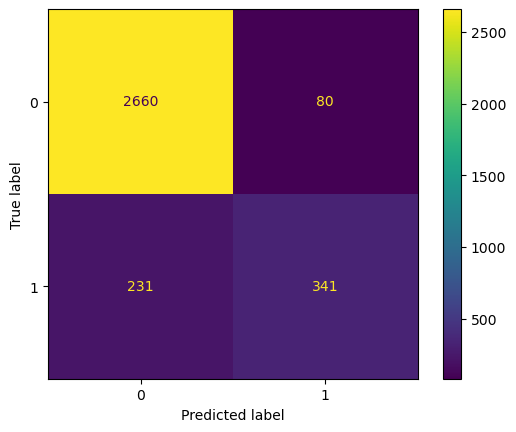

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test)
    plt.show()

print('SVC')
report(svc)